## Shared Randomness mit zwei verschränkten Qubits

Die beiden folgenden Schaltkreise erzeugen zwei verschränkte Qubits
$$
\frac{1}{\sqrt{2}} \left(|00\rangle + |11\rangle \right)
$$
die dann anschließend in zwei verschiedenen Basen gemessen werden. Einmal in der Standardbasis und einmal in der Hadamard-Basis (Anwendung von Hadamard vor der Messung)

### Messung in der Standardbasis

In [1]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, execute, Aer, IBMQ
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt
import numpy as np

In [2]:
backend = Aer.get_backend('qasm_simulator')

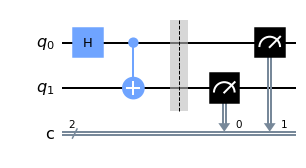

In [3]:
qc_cb = QuantumCircuit(2,2)

qc_cb.h(0)
qc_cb.cx(0,1)
qc_cb.barrier()
qc_cb.measure([1,0],[0,1])
qc_cb.draw('mpl')

{'11': 4997, '00': 5003}


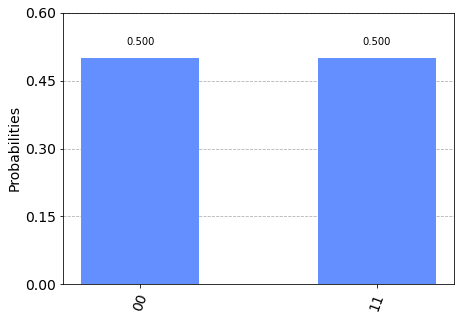

In [4]:
# Simmulation von 10000 Messungen
job = execute(qc_cb, backend, shots=10000)
result = job.result()
counts = result.get_counts(qc_cb)
print(counts)
plot_histogram(counts)

### Messung in der Hadamard-Basis

Vor den jeweiligen Messungen wird Hadamard angewendet.

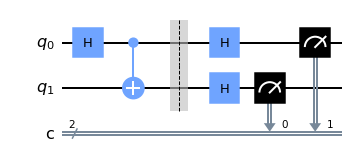

In [5]:
qc_hb = QuantumCircuit(2,2)

qc_hb.h(0)
qc_hb.cx(0,1)
qc_hb.barrier()
# Anwendung von Hadamard vor der Messung
qc_hb.h(0)
qc_hb.h(1)
qc_hb.measure([1,0],[0,1])
qc_hb.draw('mpl')

{'00': 4972, '11': 5028}


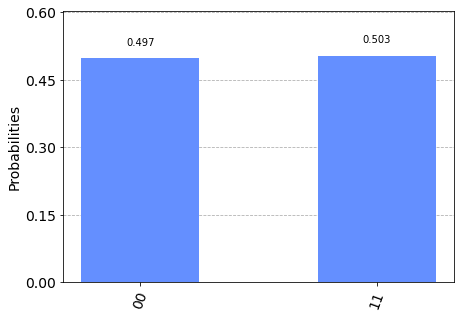

In [6]:
# Simmulation von 10000 Messungen
job = execute(qc_hb, backend, shots=10000)
result = job.result()
counts = result.get_counts(qc_hb)
print(counts)
plot_histogram(counts)